<font color="C335AA">in the name of god</font>

CA1

question 1.1

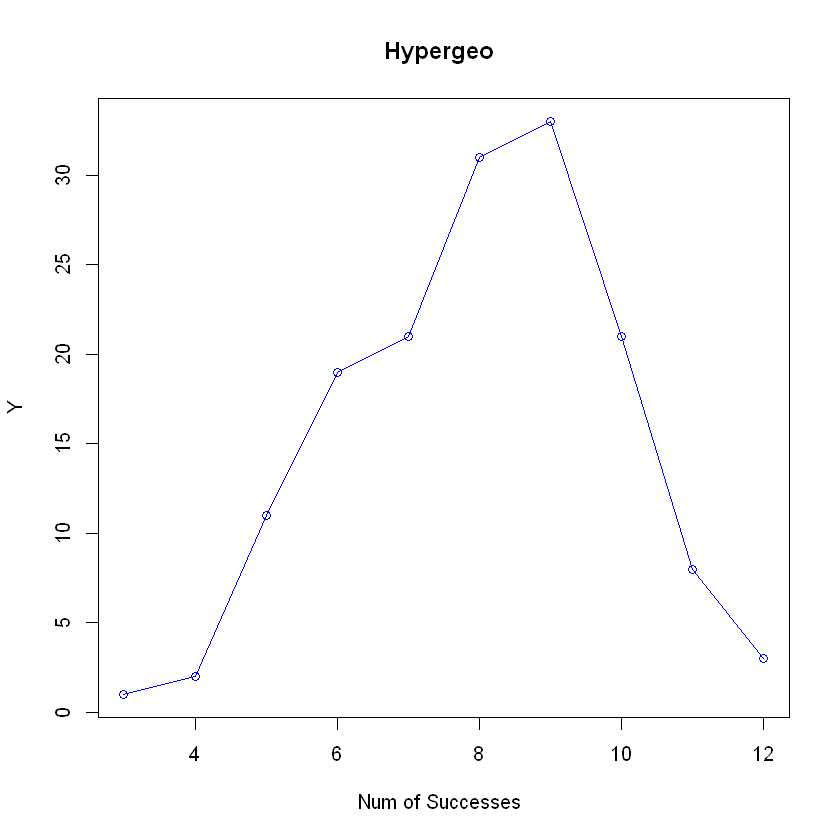

In [5]:
nn <- 150
m <- 20
n <- 80
k <- 40
set.seed(425)
me <- rhyper(nn, m, n, k)
scale <- table(me)
par(bg="white")
x_vals <- as.numeric(names(scale))
y_vals <- as.numeric(scale)
plot(
    x_vals, y_vals,
    type = "o", col = "blue",
    main = "Hypergeo ",
    xlab = "Num of Successes ",
    ylab = "Y"
)


question 1.2

In [6]:
func1 <- function(){
seque1 <- seq(from = 100, to = 10000, by = 50)
m <- 20
n <- 80
k <- 40
N <- 100
set.seed(425)
mylist_mean <- list()
mylist_var <- list()
for (x in seque1) {
    me <- rhyper(x, m, n, k)
    miangin <- mean(me)
    vari <- var(me)
    mylist_mean <- append(mylist_mean, list(miangin))
    mylist_var <- append(mylist_var, list(vari))
}
result_table <- data.frame(mylist_mean = unlist(mylist_mean), mylist_var = unlist(mylist_var))
return(result_table)
}

df <- func1()
func2 <- function() {
    m <- 20
    N <- 100
    n <- 80
    k <- 40
    p <- m / N
    miangin <- p * k
    vari <- k * p * (1 - p) * (N - k) / (N - 1)
    return(list(miangin = miangin, vari = vari))
}


question 1.3

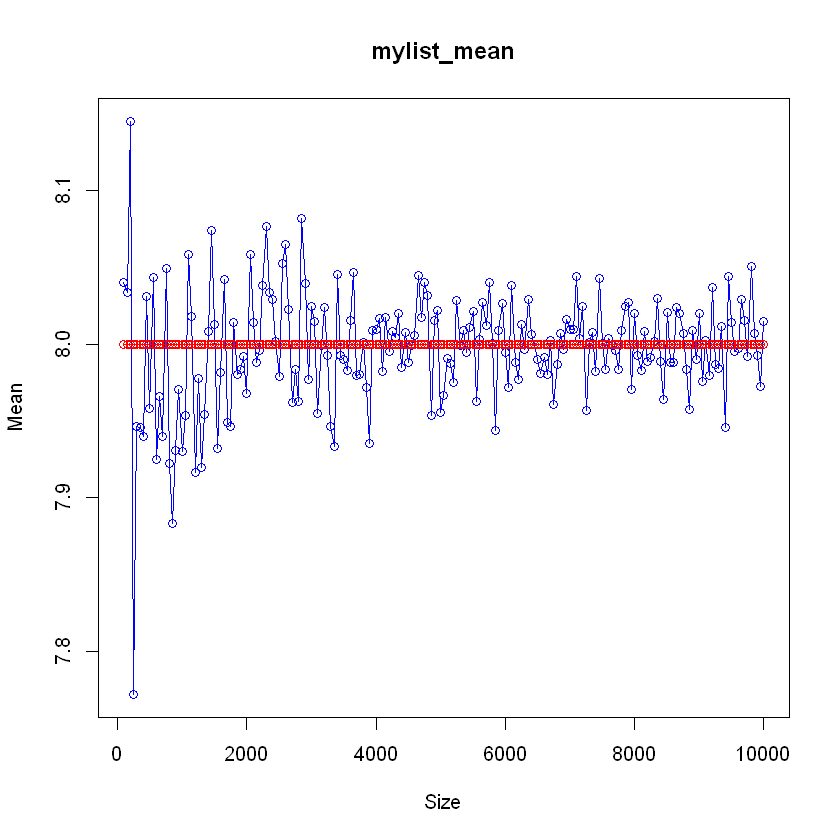

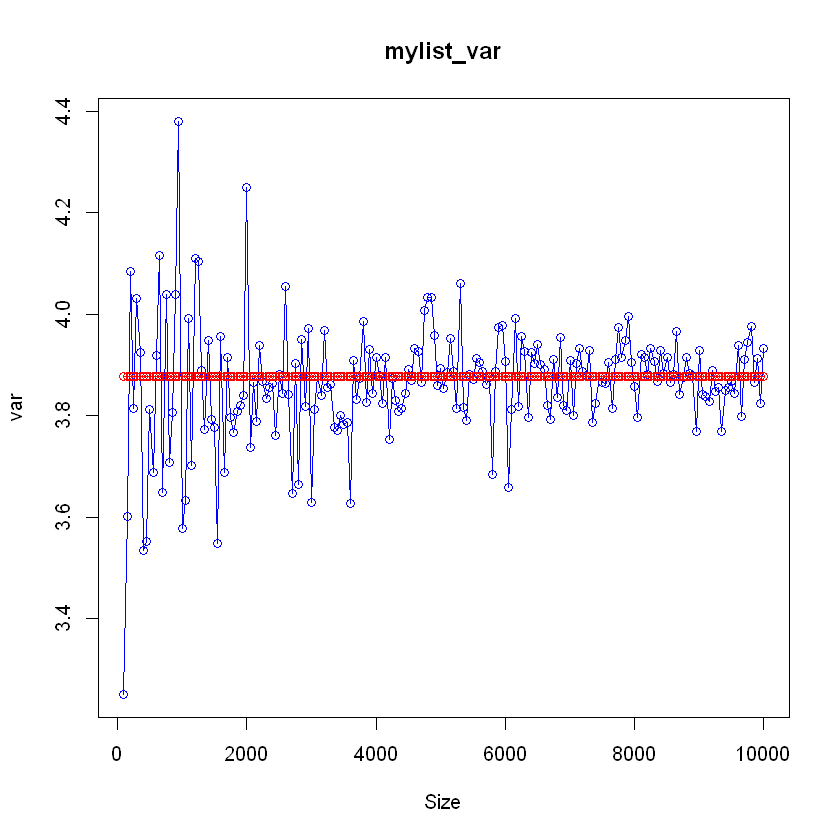

In [9]:
seque1 <- seq(from = 100, to = 10000, by = 50)
result <- func1()
par(bg="white")
plot(seque1,result$mylist_mean, type = "o", col = "blue", xlab = "Size", ylab = "Mean", 
     main = "mylist_mean")
result2 <- func2()
lines(seque1, rep(result2$miangin, length(seque1)), type = "o", col = "red")

plot(seque1,result$mylist_var, type = "o", col = "blue", xlab = "Size", ylab = "var", 
     main = "mylist_var")
lines(seque1, rep(result2$vari, length(seque1)), type = "o", col = "red")


Comparison of practical and theoretical graphs using the variance and mean formulas in this distribution

question 1.4

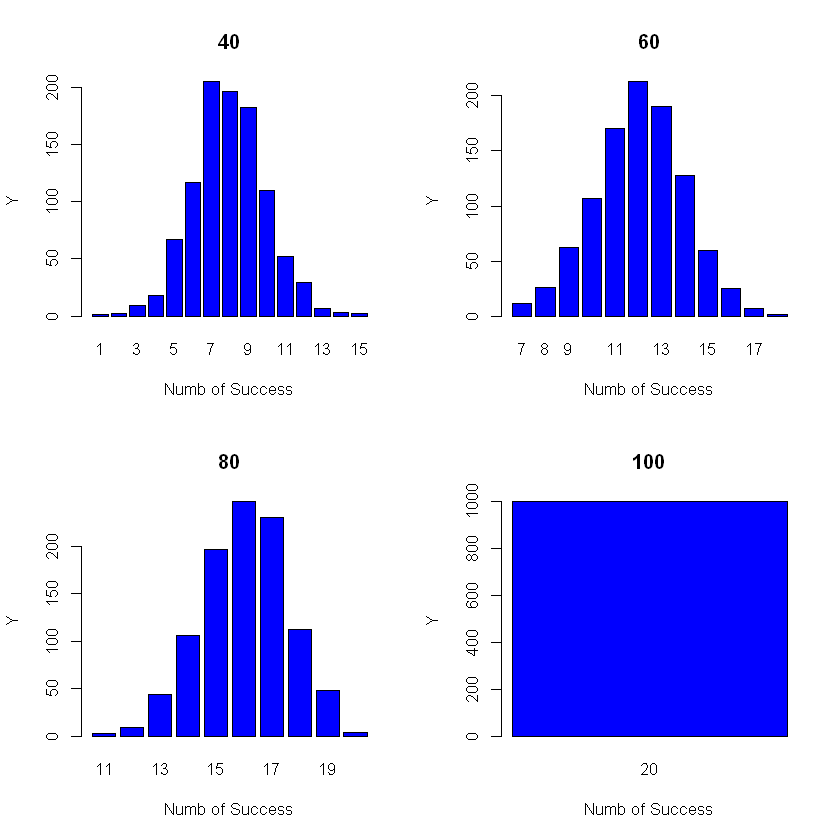

In [11]:
set.seed(425)
m <- 20
N <- 100
n <- 80
k <- list(40, 60, 80, 100)
mylists <- list()

par(mfrow = c(2, 2), bg = "white")

for (K in k) {
    me <- rhyper(1000, m, n, K)
    tables <- table(me)
    barplot(tables, 
        col = "blue", 
        main = paste(K), 
        xlab = "Numb of Success", 
        ylab = "Y")
}

The graphs show that the more entities we examine, the more fraud we can catch. For example, if we examine every 100 entities, at most, all frauds will be caught.

question 1.5

In [15]:
pmf_hygeo <- function(N){
    m <- 20
    n <- N-20
    k <- 40
    set.seed(425)
    x <- seq(0:20)
    pmf <- dhyper(x, m, n, k)
    return(pmf)
}
pmf_bino <- function(N) {
    set.seed(425)
    m <-20
    x <- seq(0:20)
    p <- m/N
    pmf<-dbinom(x,40,p)
    return(pmf)
}
print(pmf_hygeo(1000))
print(pmf_bino(1000))

 [1] 3.727696e-01 1.466148e-01 3.544876e-02 5.904997e-03 7.198472e-04
 [6] 6.658206e-05 4.780972e-06 2.704426e-07 1.215899e-08 4.364439e-10
[11] 1.251631e-11 2.859557e-13 5.170238e-15 7.316375e-17 7.967571e-19
[16] 6.511155e-21 3.842098e-23 1.537374e-25 3.712445e-28 4.060486e-31
[21] 0.000000e+00
 [1] 3.638371e-01 1.447923e-01 3.742930e-02 7.065736e-03 1.038231e-03
 [6] 1.235989e-04 1.225178e-05 1.031400e-06 7.484083e-08 4.734828e-09
[11] 2.635340e-10 1.299743e-11 5.713154e-13 2.248618e-14 7.954293e-16
[16] 2.536446e-17 7.307886e-19 1.905685e-20 4.503229e-22 9.649777e-24
[21] 1.875564e-25


question 1.6

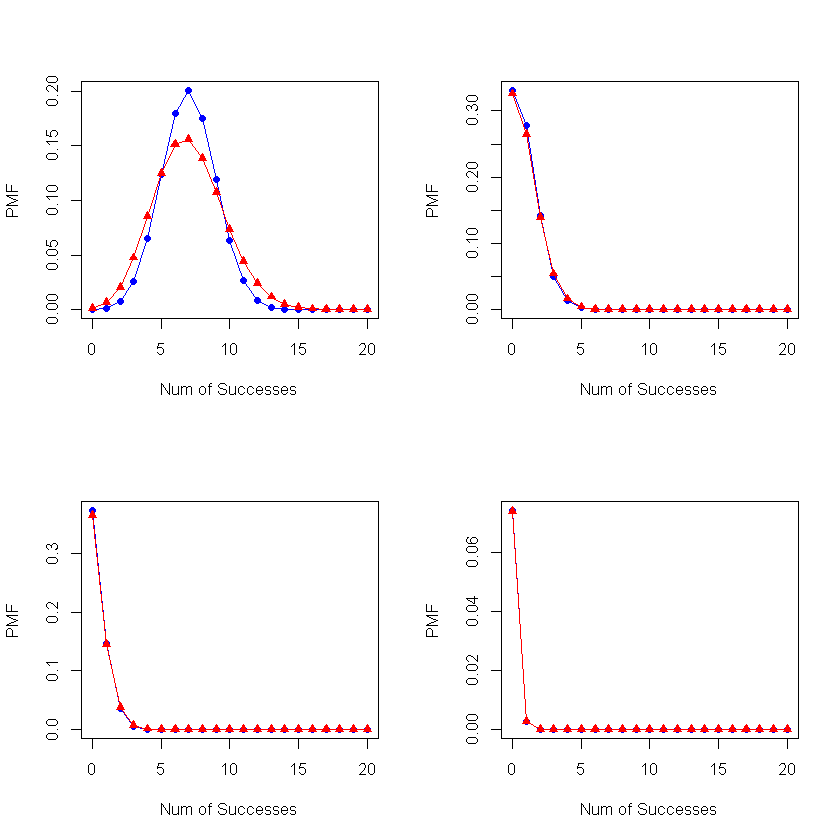

In [ ]:
N_s <- list(100, 500, 1000, 10000)

par(mfrow = c(2, 2), bg = "white")

for (N in N_s) {
    x <- 0:20
    pmf_h <- pmf_hygeo(N)
    pmf_b <- pmf_bino(N)
    plot(x, pmf_h, type = "o", col = "blue", pch = 16, ylim = c(0, max(c(pmf_h, pmf_b))), 
    xlab = "Num of Successes", ylab = "PMF")
    lines(x, pmf_b, type = "o", col = "red", pch = 17)
}

question 1.7

The graphs obtained for different values ​​of N show that as N becomes larger, the binomial graph will tend to be hypergeometric and will become closer together.The theoretical result we obtained also shows the same thing.

question 2.1

In [16]:
pmf_bino2 <- function(x) {
    set.seed(425)
    p <- 450 / 1000
    pmf <- dbinom(x, 1000, p)
    return(pmf)
}
cdf_maker <- function(x){
    cdf_final <- 0
    for(i in 0:x){
        cdf_final <- pmf_bino2(i) + cdf_final
    }
    return(cdf_final)
}
xx <- cdf_maker(430)
xx

[1] 0.1074638

question 2.2

In [17]:
xxx <- pnorm(430, 450, sqrt(450 * 0.55))
xxx


[1] 0.1018139

In [18]:
fault_value <- xx - xxx
fault_value

[1] 0.005649884

question 2.3

In [19]:
xxxx <- pnorm(430.5, 450, sqrt(450 * 0.55))
xxxx

[1] 0.1075799

In [20]:
fault_value2 <- xx - xxxx
fault_value2

[1] -0.0001161443

question 2.4

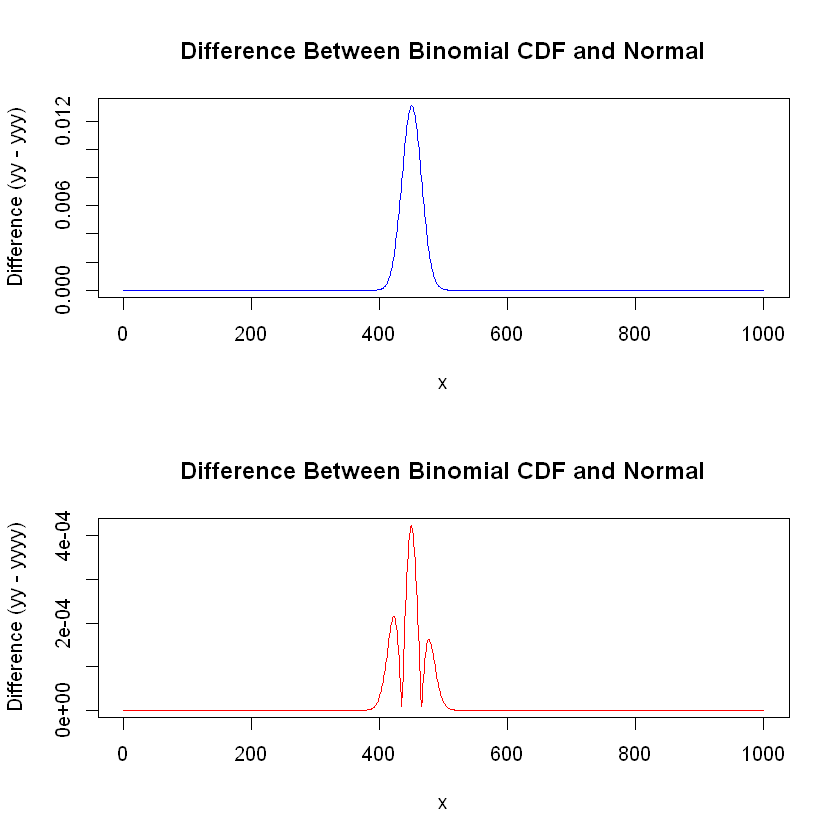

In [ ]:
pmf_bino2 <- function(x) {
    set.seed(425)
    p <- 450 / 1000
    pmf <- dbinom(x, 1000, p)
    return(pmf)
}
cdf_maker <- function(x){
    cdf_final <- 0
    for(i in 0:x){
        cdf_final <- pmf_bino2(i) + cdf_final
    }
    return(cdf_final)
}
cdf_list <- seq(from = 0.5, to = 1000.5, by = 1)
yy <- list()
for (i in 0:1000) {
    yy <- append(yy, cdf_maker(i))
}
yyy <- pnorm(0:1000, 450, sqrt(450 * 0.55))
yyyy <- pnorm(0.5:1000.5, 450, sqrt(450 * 0.55))
wrongness1 <- abs(unlist(yy) - yyy)
wrongness2 <- abs(unlist(yy) - yyyy)

par(bg = "white", mfrow = c(2, 1))

plot(
    0:1000, wrongness1, type = "l", col = "blue",
    xlab = "x", ylab = "Difference (yy - yyy)",
    main = "Difference Between Binomial CDF and Normal"
)

plot(
    0:1000, wrongness2, type = "l", col = "red",
    xlab = "x", ylab = "Difference (yy - yyyy)",
    main = "Difference Between Binomial CDF and Normal"
)

wrongness1:This difference represents the difference between the binomial CDF and the normal approximation without using continuity correction.
Due to the discrete nature of the binomial distribution, the difference is greater at points where the binomial distribution is further from normal continuity.
This difference usually decreases at extreme values ​​(very small or very large) and also near the mean value.
wrongness2:This is a similar difference, but using continuity correction (by changing the evaluation points to 0.5:1000.5).
Continuity correction usually makes the normal approximation closer to the binomial distribution.
Therefore, wrongness2 values ​​are generally expected to be lower than wrongness1.

question 2.5

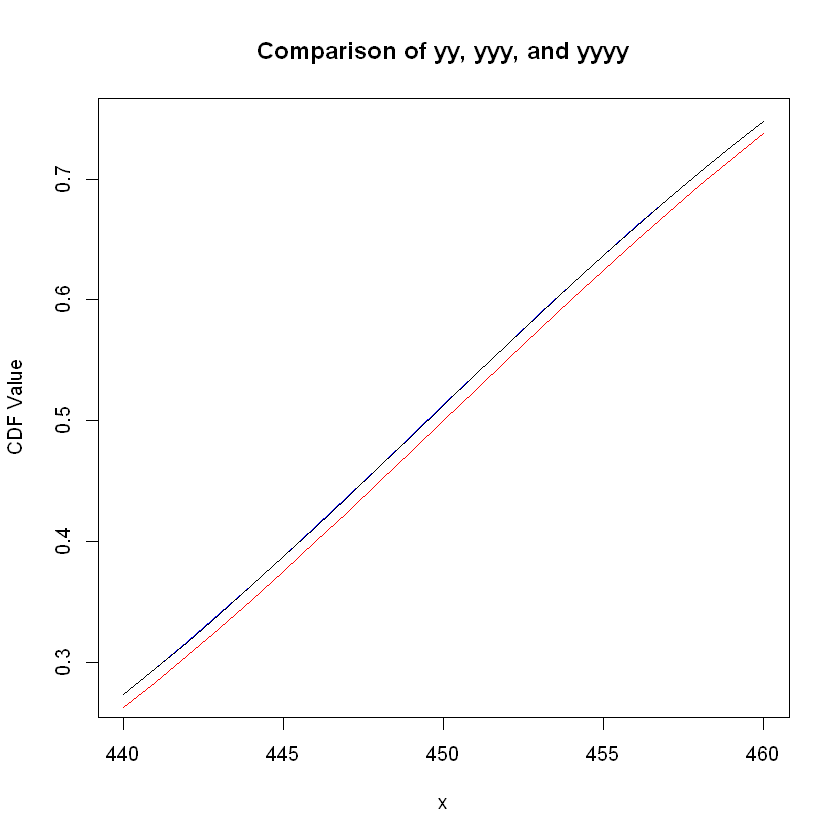

In [23]:
pmf_bino2 <- function(x) {
    set.seed(425)
    p <- 450 / 1000
    pmf <- dbinom(x, 1000, p)
    return(pmf)
}
cdf_maker <- function(x){
    cdf_final <- 0
    for(i in 0:x){
        cdf_final <- pmf_bino2(i) + cdf_final
    }
    return(cdf_final)
}
cdf_list <- seq(from = 0.5, to = 1000.5, by = 1)
yy <- list()
for (i in 440:460) {
    yy <- append(yy, cdf_maker(i))
}
yyy <- pnorm(440:460, 450, sqrt(450 * 0.55))
yyyy <- pnorm(440.5:460.5, 450, sqrt(450 * 0.55))
par(bg = "white")
plot(
    440:460, yy, type = "l", col = "blue",
    xlab = "x", ylab = "CDF Value",
    main = "Comparison of yy, yyy, and yyyy"
)
lines(440:460, yyy, type = "l", col = "red")
lines(440:460, yyyy, type = "l", col = "black")

question 2.6

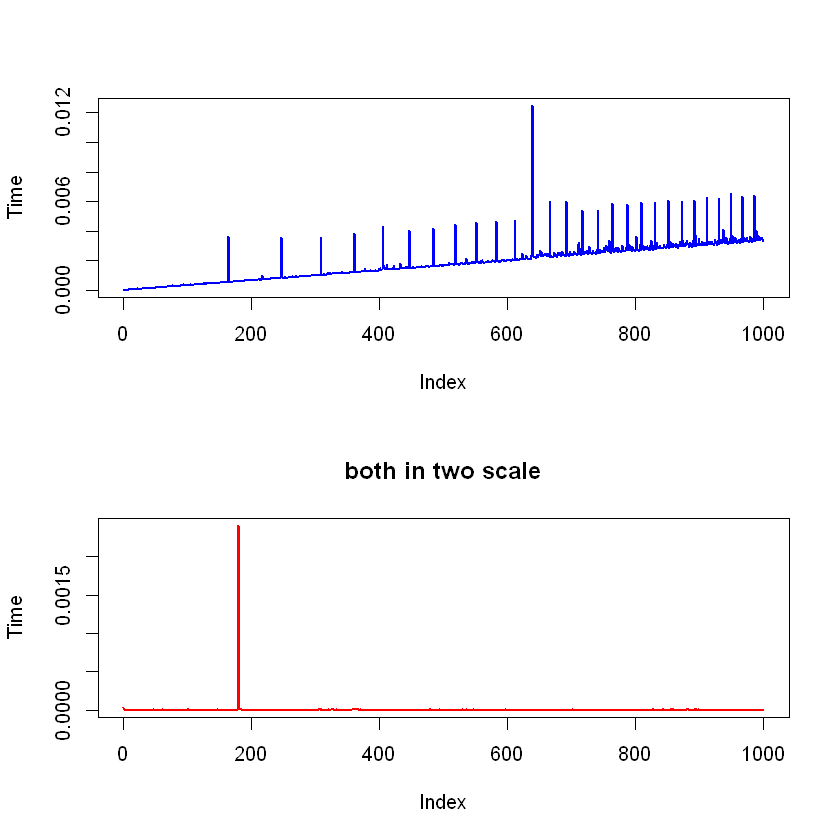

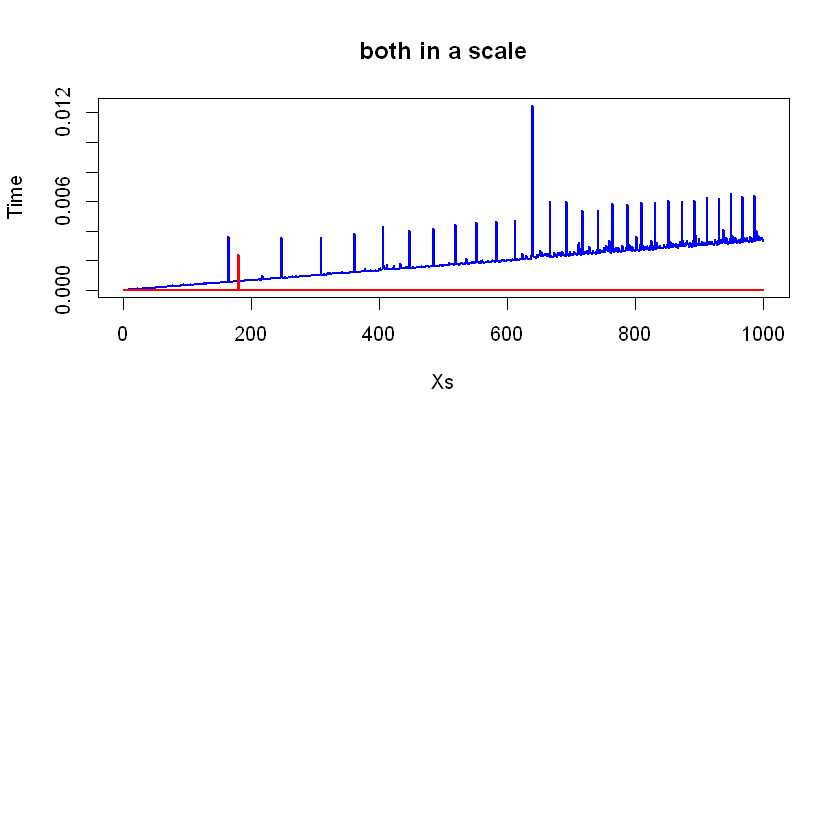

In [24]:
pmf_bino2 <- function(x) {
    set.seed(425)
    p <- 450 / 1000
    pmf <- dbinom(x, 1000, p)
    return(pmf)
}

cdf_maker <- function(x) {
    cdf_final <- 0
    for (i in 0:x) {
        cdf_final <- pmf_bino2(i) + cdf_final
    }
    return(cdf_final)
}

cdf_list <- seq(from = 0.5, to = 1000.5, by = 1)
yy <- list()
time_yy <- numeric()  

for (i in 0:1000) {
    start_yy <- Sys.time()
    yy <- append(yy, cdf_maker(i))
    end_yy <- Sys.time()
    time_yy <- c(time_yy, as.numeric(end_yy - start_yy))
}
time_yyyy <- numeric()
seque22 <- seq(from = 0.5, to = 1000.5, by = 1)
for (i in seque22){
start_yyyy <- Sys.time()
yyyy <- pnorm(i, 450, sqrt(450 * 0.55))
end_yyyy <- Sys.time()
time_yyyy <- c(time_yyyy, as.numeric(end_yyyy - start_yyyy))
}
par(bg = "white", mfrow = c(2, 1))

plot(
  0:1000, time_yy, type = "l", col = "blue", lwd = 2,
  xlab = "Index", ylab = "Time",
)

plot(
  0:1000, time_yyyy, type = "l", col = "red", lwd = 2,
  xlab = "Index", ylab = "Time",
  main = "both in two scale",
)
plot(
  0:1000, time_yy, type = "l", col = "blue", lwd = 2,
  xlab = "Xs", ylab = "Time",
  main = "both in a scale",
)
lines(
  0:1000, time_yyyy, col = "red", lwd = 2
)


Analysis of Binomial CDF:
The execution time increases with x because cdf_maker has a loop that computes the binomial PMF for every value from 0 to x.
This results in a linearly increasing time as x grows.
At small x, the time is low, but as 
x increases, the time grows significantly.
Analysis of Normal CDF:
The pnorm function is highly optimized and directly calculates the normal CDF.
Its execution time does not depend on 
x and remains constant for all values.
In the plot, the time for time_yyyy is represented as an almost flat line.
Computing the binomial CDF using cdf_maker is very expensive, and this cost grows with increasing x.
Computing the normal CDF with pnorm is more efficient and is more suitable for large values ​​of x.
Using the normal distribution is preferred in real applications, unless very high accuracy is required for discrete values.


question 2.7

In [25]:
pmf_bino2 <- function(x) {
    set.seed(425)
    p <- 450 / 1000
    pmf <- dbinom(x, 1000, p)
    return(pmf)
}

cdf_maker <- function(x) {
    cdf_final <- 0
    for (i in 0:x) {
        cdf_final <- pmf_bino2(i) + cdf_final
    }
    return(cdf_final)
}

time_yy <- numeric()
yy <- numeric()

for (i in 400:600) {
    start_yy <- Sys.time()
    yy <- c(yy, cdf_maker(i))  
    end_yy <- Sys.time()
    time_yy <- c(time_yy, as.numeric(end_yy - start_yy))  
}

time_yyyy <- numeric()
seque22 <- seq(from = 400.5, to = 600.5, by = 1)
yyyy <- numeric()

for (i in seque22) {
    start_yyyy <- Sys.time()
    yyyy <- c(yyyy, pnorm(i, 450, sqrt(450 * 0.55)))
    end_yyyy <- Sys.time()
    time_yyyy <- c(time_yyyy, as.numeric(end_yyyy - start_yyyy))
}
xx <- c(400:600)
for(i in 1:200){
    if(((time_yy[i] - time_yyyy[i]) * 100 > abs((yy[i] - yyyy[i]) * 1000000))){
        print(xx[i])
        break
}
}

[1] 522


question 2.8

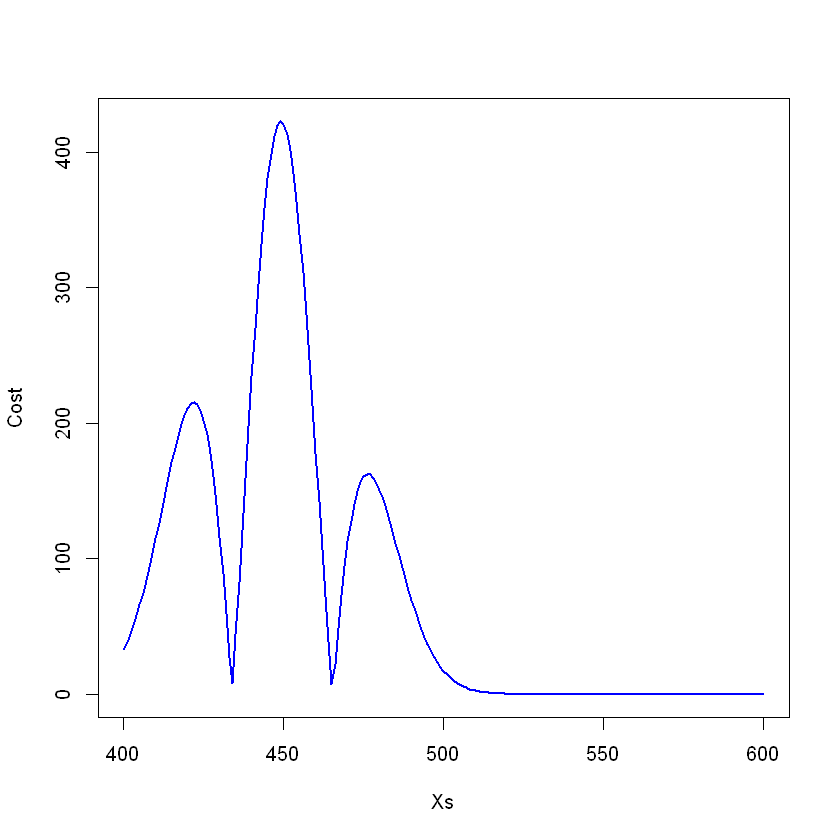

In [26]:
pmf_bino2 <- function(x) {
    set.seed(425)
    p <- 450 / 1000
    pmf <- dbinom(x, 1000, p)
    return(pmf)
}

cdf_maker <- function(x) {
    cdf_final <- 0
    for (i in 0:x) {
        cdf_final <- pmf_bino2(i) + cdf_final
    }
    return(cdf_final)
}

time_yy <- numeric()
yy <- numeric()

for (i in 400:600) {
    start_yy <- Sys.time()
    yy <- c(yy, cdf_maker(i))  
    end_yy <- Sys.time()
    time_yy <- c(time_yy, as.numeric(end_yy - start_yy))  
}

time_yyyy <- numeric()
seque22 <- seq(from = 400.5, to = 600.5, by = 1)
yyyy <- numeric()

for (i in seque22) {
    start_yyyy <- Sys.time()
    yyyy <- c(yyyy, pnorm(i, 450, sqrt(450 * 0.55)))
    end_yyyy <- Sys.time()
    time_yyyy <- c(time_yyyy, as.numeric(end_yyyy - start_yyyy))
}

hazine <- abs((yy - yyyy) * 1000000) - abs((time_yy - time_yyyy) * 100)

par(bg = "white")
plot(
  400:600, hazine, type = "l", col = "blue", lwd = 2,
  xlab = "Xs", ylab = "Cost"
)


If hazine is negative at x=430, then the binomial CDF is more cost-effective.
At this point, the time cost of computing the binomial CDF has been greater than the improvement in its accuracy over the normal approximation.
If hazine is positive, then the normal approximation is less expensive and more appropriate.


question 3.1

In [13]:
exponential <- function(N,L){
    numbers <- rexp(N,L)
    return(numbers)
}

question 3.2

In [12]:
give_more12 <- function(N) {
  a <- rexp(N, 1/15)
  list_more12 <- list()
  for (i in 1:(N - 1)) {
    if (a[i + 1] - a[i] > 12 && a[i + 1] - a[i] < 100) {
      list_more12 <- append(list_more12, a[i + 1] - a[i] - 12)
    }
  }
  return(list_more12)
}

aa <- give_more12(10)
aa


[[1]]
[1] 4.826792

[[2]]
[1] 23.10536

question 3.3

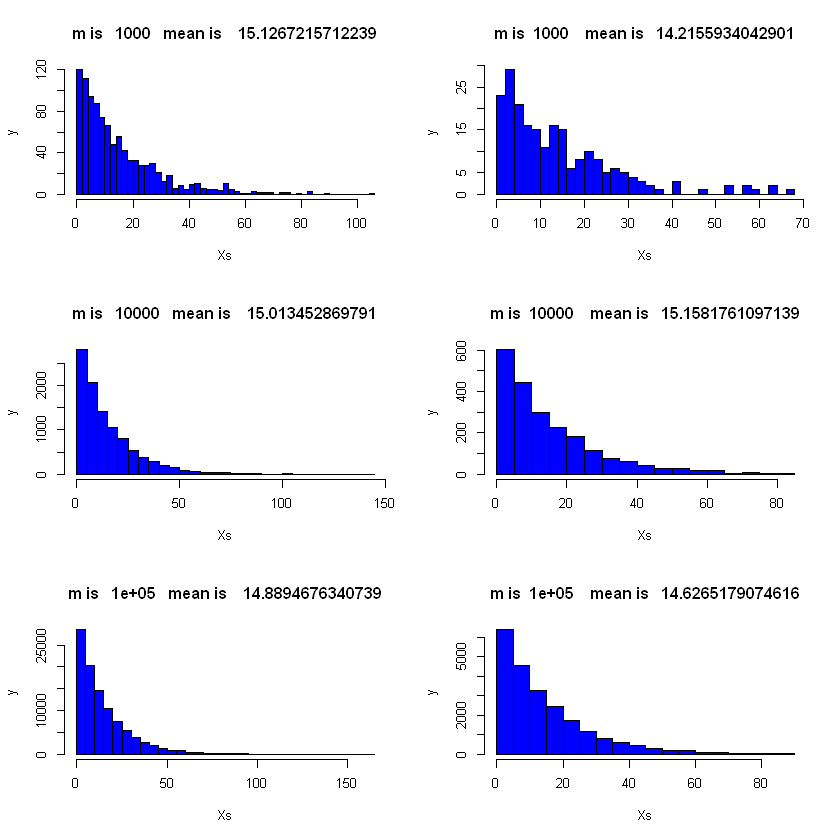

In [21]:
m <- list(1000, 10000, 100000)

par(mfrow = c(3, 2), bg = "white")

for (i in m) {
  final_answer_exp <- rexp(i, 1/15)
  final_answer_more12 <- give_more12(i)
  hist(
    final_answer_exp, breaks = 50, col = "blue",
    main = paste("m is  ", i, "  mean is   ", mean(final_answer_exp)),
    xlab = "Xs", ylab = "y"
  )
  
  hist(
    unlist(final_answer_more12), breaks = 30, col = "blue",
    main = paste("m is ", i, "   mean is  ", mean(unlist(final_answer_more12))),
    xlab = "Xs", ylab = "y"
  )
}


In the first plot, plotted for the exponential distribution, you will see that the data is mostly concentrated in smaller areas, since the exponential distribution tends to make the lower values ​​larger. In the second plot, plotted for differences greater than 12 the data will typically be spread out over a different range due to the restrictions imposed on differences greater than 12. This distribution will typically have higher values ​​because only differences starting at 12 have been selected.

question 3.4

Conclusion:
According to the resulting graphs and the properties of the exponential distribution:
The exponential distribution should produce smaller values ​​more often due to its memoryless property.
While the distribution of differences greater than 12, by restricting the data to differences above 12, shows more higher values ​​and deviates from the usual properties of the exponential distribution.
If we want to use the hypothesis test to confirm memorylessness, we need to check whether the data behave independently of the waiting time history. If the data follows the exponential distribution, this hypothesis of memorylessness is confirmed. In general, the hypothesis test can show whether the data is consistent with the properties of the exponential distribution or not. If the data follows the exponential distribution, we can conclude that the memoryless property is correctly applied to the data.

question 3.5

In [30]:
final_answer_more12_next <- give_more12(1000)
final_answer_more15 <- list()

for (i in 1:(length(final_answer_more12_next))) {
  if (unlist(final_answer_more12_next)[i]>3) {
    final_answer_more15 <- append(final_answer_more15, unlist(final_answer_more12_next)[i])
  }
}

length(final_answer_more15)/length(final_answer_more12_next)


[1] 0.776824

In [31]:
theory <- pexp(3, 1 / 15)
1 - theory

[1] 0.8187308

question 4.1

In [32]:
random_uni_value <- runif(1000000, 0, 1)

question 4.2

In [33]:
logaritm <- -2*log(random_uni_value)

question 4.3

In [34]:
y2<- dexp(0:1000,1/2)

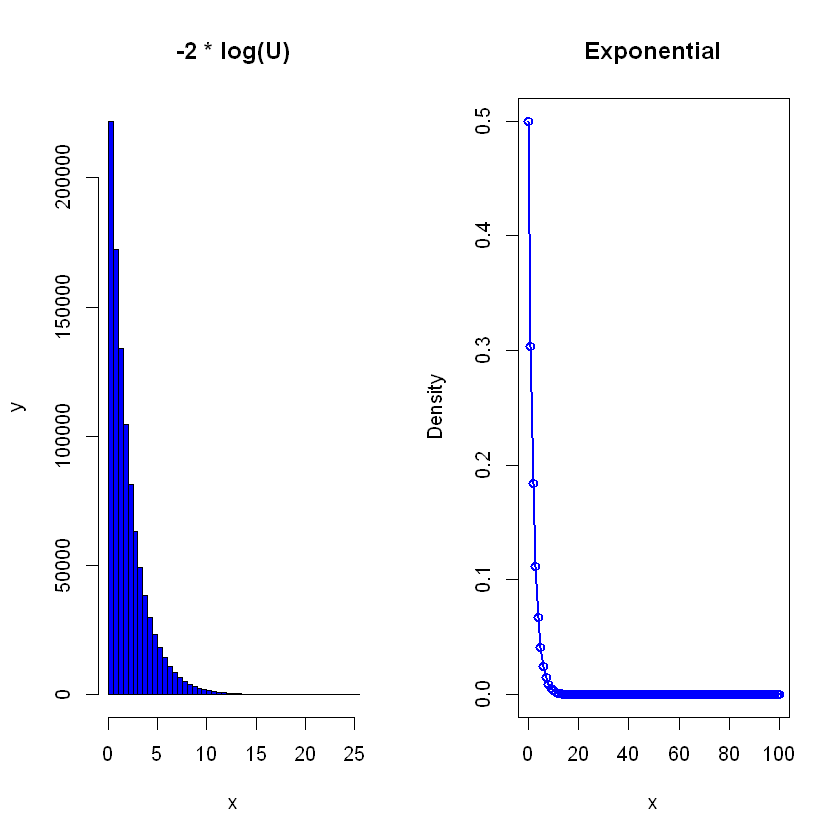

In [10]:
random_uni_value <- runif(1000000, 0, 1)
logaritm <- -2 * log(random_uni_value)
y2 <- dexp(0:100, 1/2)

par(mfrow = c(1, 2), bg = "white")

hist(
  logaritm, breaks = 50, col = "blue",
  main = "-2 * log(U)", xlab = "x", ylab = "y"
)

plot(
  0:100, y2, type = "o", col = "blue", lwd = 2,
  main = "Exponential", xlab = "x", ylab = "Density"
)


According to the graphs, we conclude that the logarithmic transformation has transformed the exponential distribution into a uniform distribution.

question 4.4

In [23]:
U1 <- runif(1000000, 0, 1)
U2 <- runif(1000000, 0, 1)

question 4.5

In [24]:
z1 <- sqrt(-2 * log(U1)) * cos(2 * pi * U2)
z2 <- sqrt(-2 * log(U2)) * sin(2 * pi *   U1)
x <- seq(-4,4,0.1)
y3 <- dnorm(x)


question 4.6

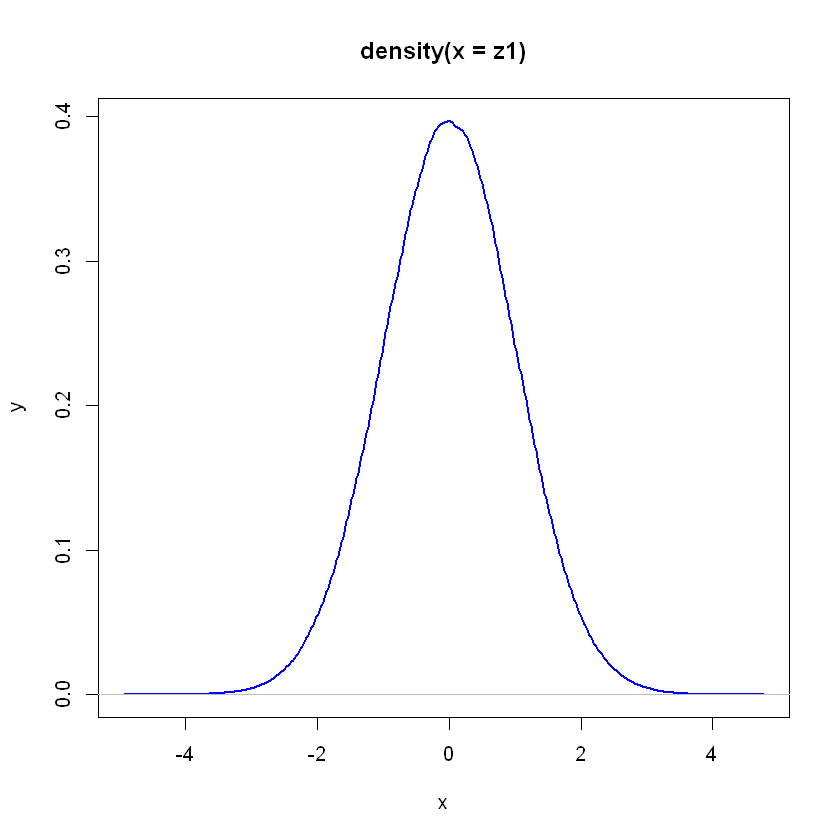

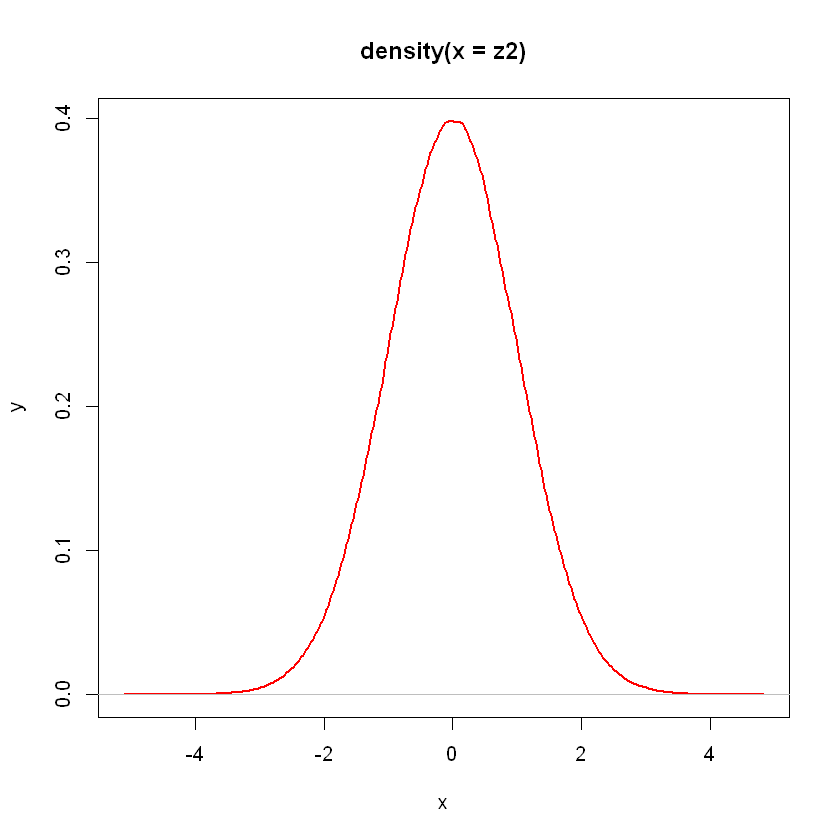

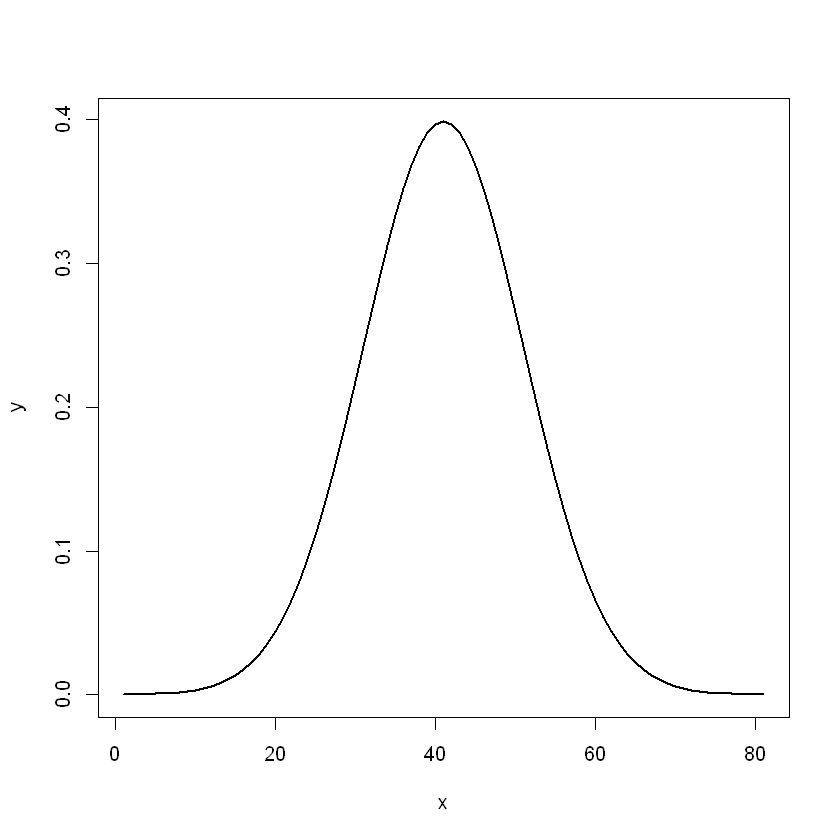

In [28]:
par(bg = "white")
plot(
   density(z1), type = "l", col = "blue", lwd = 2,
   xlab = "x", ylab = "y"
)
plot(
   density(z2), type = "l", col = "red", lwd = 2,
   xlab = "x", ylab = "y"
)
plot(
   y3, type = "l", col = "black", lwd = 2,
   xlab = "x", ylab = "y"
)


According to the graphs, we conclude that the BoxMuller transformation has transformed the uniform distribution into a standard normal distribution.